## SPAM HAM Prediction in text using NLP

In [1]:
import numpy as np
import pandas as pd
import re
import gensim
from tqdm import tqdm
from gensim.utils import simple_preprocess
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('spamhamdata.csv',sep='\t',header=None,names=['label','message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
lemmatizer = WordNetLemmatizer()

In [6]:
review = df['message']
review = list(review)

# for i in range(len(review)):
#     review[i] = re.sub('^[A-Za-z]',"",review[i]) # replacing anything not matching A-Z or a-z with ""(blank)


for i,val in enumerate(review):
    review[i] = review[i].lower()
review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]

In [7]:
len(review)

5572

In [12]:
words = []
from nltk.tokenize import word_tokenize
# tokenizing
for i,sent in enumerate(review):
    words.append(word_tokenize(review[i]))


In [13]:
for i,val in enumerate(words):
    string=''
    for valu in val:
#         print(val)
        string+=" "+valu
    words[i]=string    

In [15]:
len(words)

5572

In [16]:
Words=[]
for word in words:
    Words.append(simple_preprocess(word))

In [17]:
len(Words)

5572

In [20]:
#lets train a Word2Vec model from scratch:
model = gensim.models.Word2Vec(Words,epochs=50) # see its hyperparameters

In [21]:
model.wv.index_to_key # the vocab of the model
model.corpus_count #toral words in the vocab

5572

In [22]:
model.wv['good'].shape # each word has 100 dimensions

(100,)

In [23]:
# Average Word 2 Vec:
def avg_word2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key])

In [24]:
X = []
for i in tqdm(range(len(Words))):
    X.append(avg_word2vec(Words[i]))

  5%|███▊                                                                         | 274/5572 [00:00<00:01, 2706.86it/s]C:\Users\shadj\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\shadj\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:01<00:00, 2946.32it/s]


In [25]:
X = np.array(X)
X.shape

(5572,)

In [26]:
y = (df["label"]=='ham').astype(int)

In [27]:
y = np.array(y)
y.reshape(1,-1)

array([[1, 1, 0, ..., 1, 1, 1]])

In [29]:
X.reshape(1,-1)

array([[-0.01200211, -0.00534446, -0.01697053, ...,  0.00792747,
         0.02726053,  0.01489368]])

In [30]:
X = np.array(X)
X = X.reshape(-1,1)

In [31]:
data = pd.DataFrame(X)
data["Output"] = y

In [32]:
data.dropna(inplace=True)

In [33]:
data.isnull().sum()

0         0
Output    0
dtype: int64

In [34]:
X = np.array(data[0])
y = np.array(data["Output"])

In [35]:
X = X.reshape(-1,1)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [38]:
model = model.fit(X_train,y_train)

In [39]:
y_pred = model.predict(X_test)

In [40]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.46      0.38      0.41       184
           1       0.88      0.91      0.90       927

    accuracy                           0.82      1111
   macro avg       0.67      0.64      0.66      1111
weighted avg       0.81      0.82      0.82      1111



In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_train,y_train)

In [42]:
y_pred = model.predict(X_test)

In [43]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.46      0.38      0.41       184
           1       0.88      0.91      0.90       927

    accuracy                           0.82      1111
   macro avg       0.67      0.64      0.66      1111
weighted avg       0.81      0.82      0.82      1111



<AxesSubplot: >

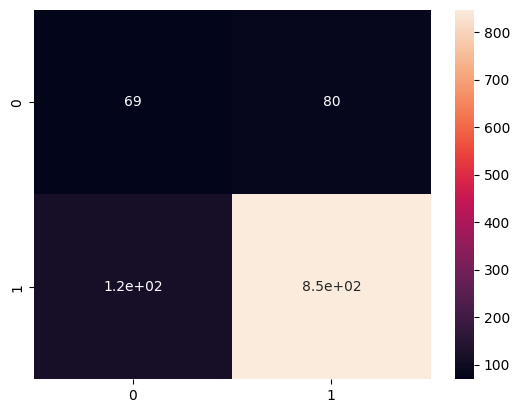

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sbn

sbn.heatmap(confusion_matrix(y_test,y_pred),annot=True)